$$\text{\Large{Kaggle Competition}}$$
$$\text{\Large{Diabetes prediction}}$$

### Exploratory Data Analysis (EDA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegressionCV

In [2]:
# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)

In [3]:
# Load datasets
train = pd.read_csv('train.csv')
competition_test = pd.read_csv('test.csv')
print(f'Train shape: {train.shape}, Test shape: {competition_test.shape}')

Train shape: (700000, 26), Test shape: (300000, 25)


In [4]:
# checking types of columns
train.dtypes

id                                      int64
age                                     int64
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholesterol                         int64
ldl_cholesterol                         int64
triglycerides                           int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
smoking_status                         object
employment_status                 

In [5]:
# Drop id
df = pd.read_csv('train.csv').set_index('id')
competition_test = pd.read_csv('test.csv').set_index('id')

# Check for missing values
df.isnull().sum()

age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
diagnosed_diabetes                    0


In [6]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
train_sample = train.sample(n=60000, random_state=42)

In [7]:
numeric_cols = train_sample.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_sample.select_dtypes(include=['object']).columns.tolist()

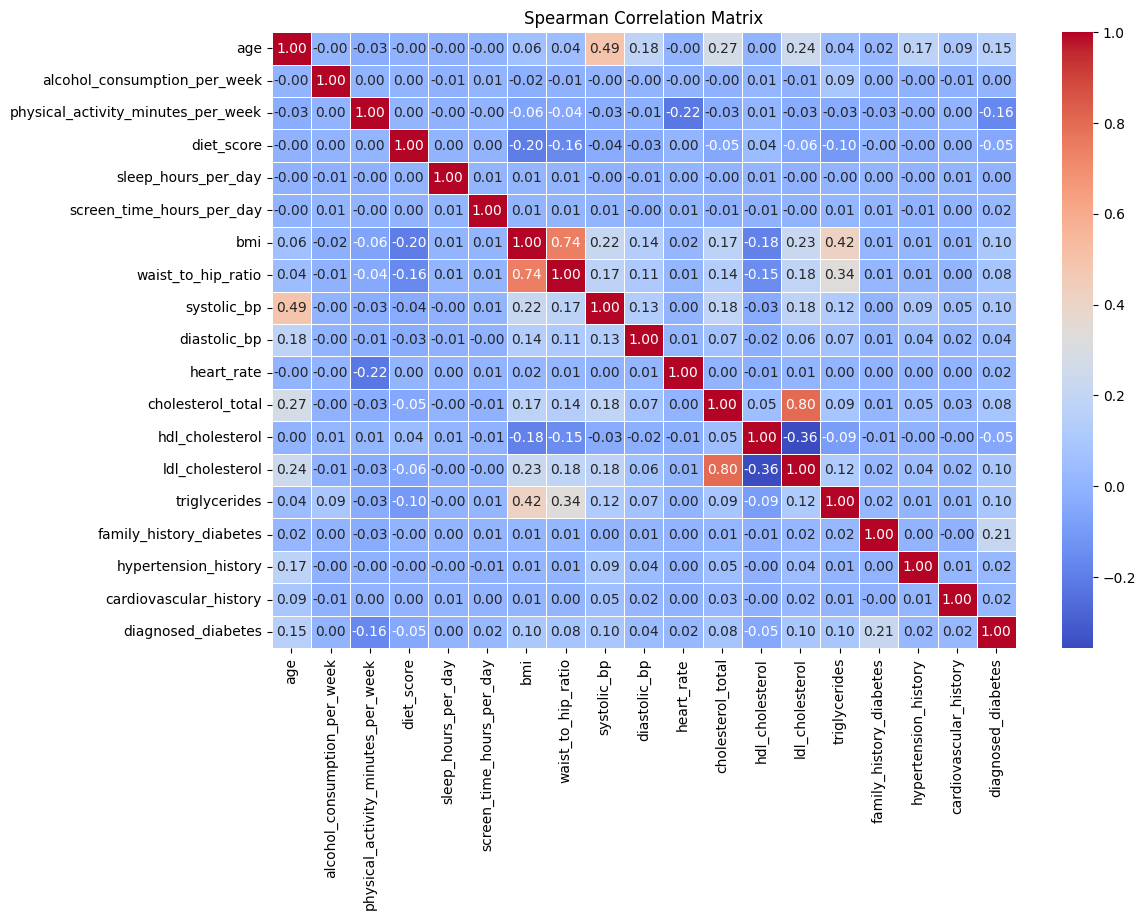

In [8]:
corr_matrix = train_sample[numeric_cols].corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

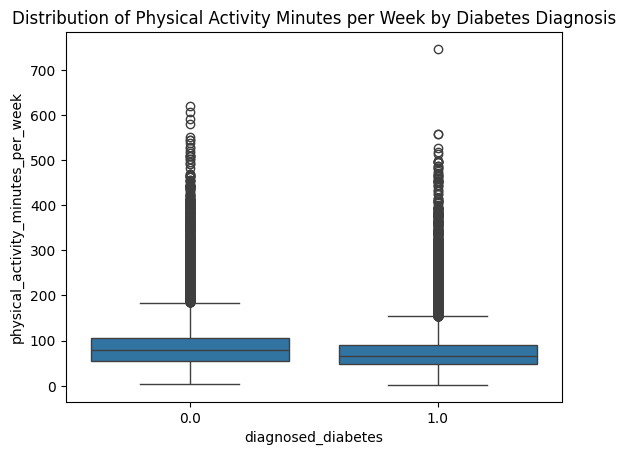

In [9]:
sns.boxplot(data=train_sample, x='diagnosed_diabetes', y='physical_activity_minutes_per_week')
plt.title("Distribution of Physical Activity Minutes per Week by Diabetes Diagnosis")
plt.show()

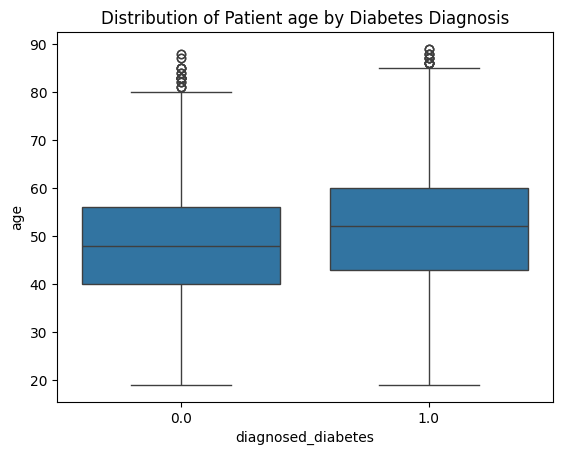

In [10]:
sns.boxplot(data=train_sample, x='diagnosed_diabetes', y='age')
plt.title("Distribution of Patient age by Diabetes Diagnosis")
plt.show()

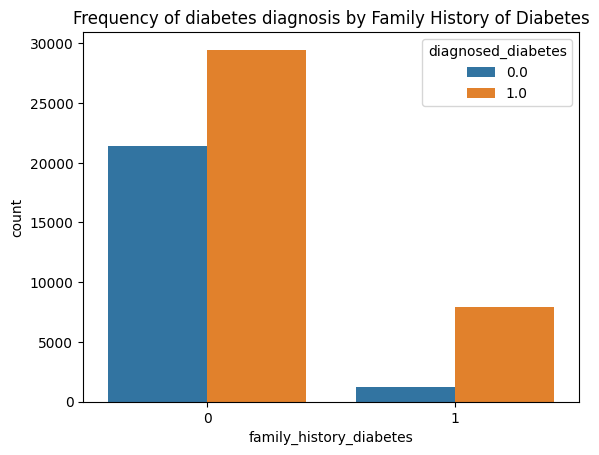

In [11]:
sns.countplot(data=train_sample, x='family_history_diabetes', hue='diagnosed_diabetes')
plt.title("Frequency of diabetes diagnosis by Family History of Diabetes")
plt.show()

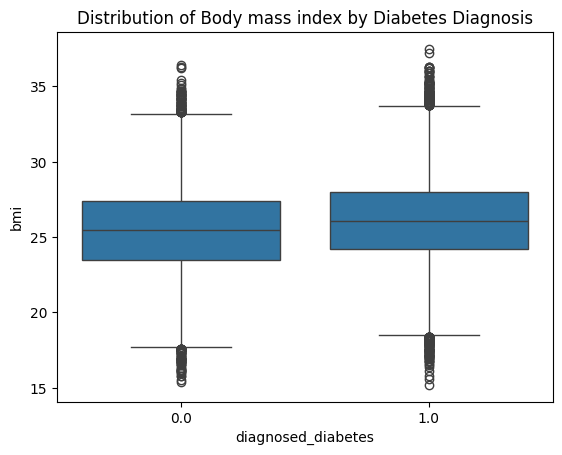

In [12]:
sns.boxplot(data=train_sample, x='diagnosed_diabetes', y='bmi')
plt.title("Distribution of Body mass index by Diabetes Diagnosis")
plt.show()

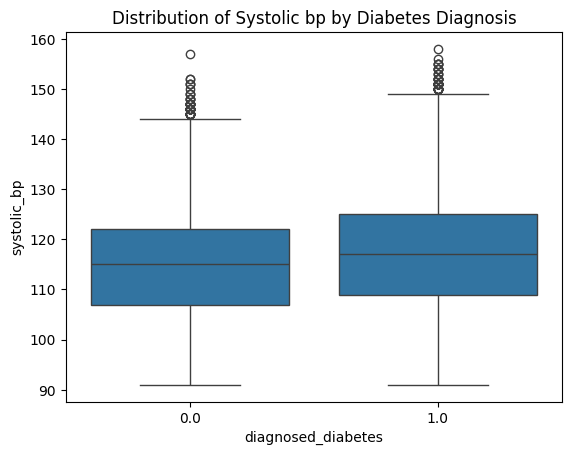

In [13]:
sns.boxplot(data=train_sample, x='diagnosed_diabetes', y='systolic_bp')
plt.title("Distribution of Systolic bp by Diabetes Diagnosis")
plt.show()

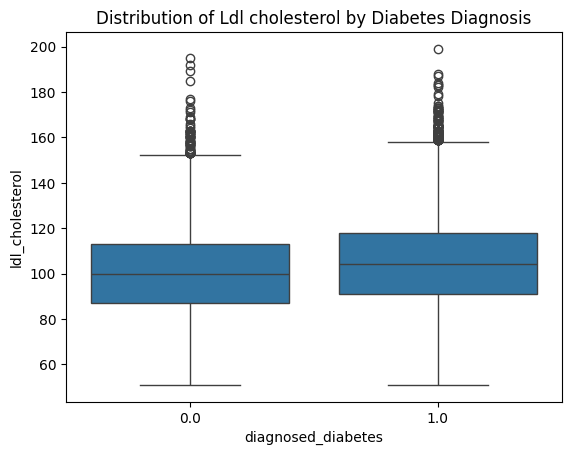

In [14]:
sns.boxplot(data=train_sample, x='diagnosed_diabetes', y='ldl_cholesterol')
plt.title("Distribution of Ldl cholesterol by Diabetes Diagnosis")
plt.show()

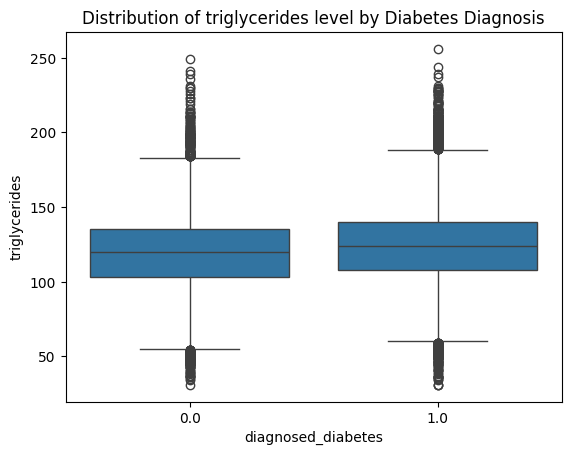

In [15]:
sns.boxplot(data=train_sample, x='diagnosed_diabetes', y='triglycerides')
plt.title("Distribution of triglycerides level by Diabetes Diagnosis")
plt.show()

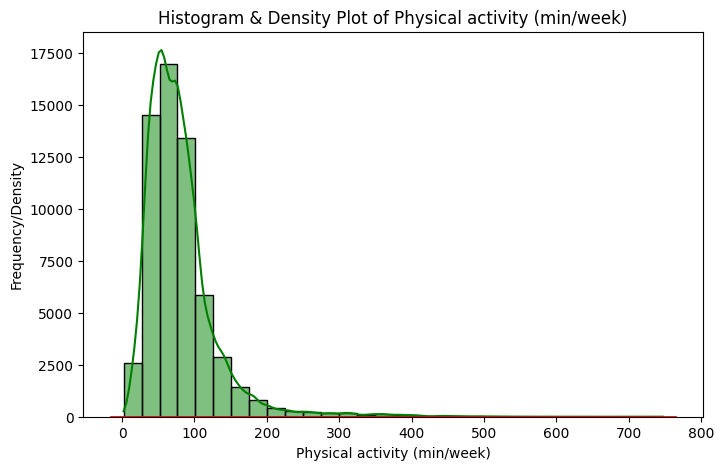

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(train_sample["physical_activity_minutes_per_week"], bins=30, kde=True, color="green", alpha=0.5)
sns.kdeplot(train_sample["physical_activity_minutes_per_week"], color="red", linewidth=2)
plt.title("Histogram & Density Plot of Physical activity (min/week)")
plt.xlabel("Physical activity (min/week)")
plt.ylabel("Frequency/Density")
plt.show()

This feature is right skewed and might benefit from a log transformation.

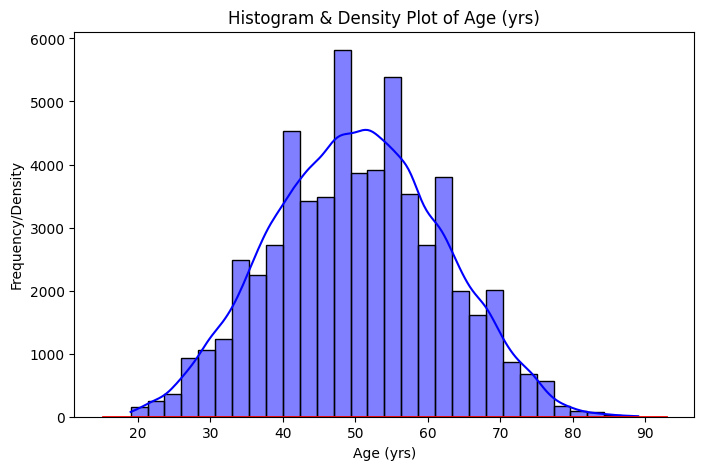

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(train_sample["age"], bins=30, kde=True, color="blue", alpha=0.5)
sns.kdeplot(train_sample["age"], color="red", linewidth=2)
plt.title("Histogram & Density Plot of Age (yrs)")
plt.xlabel("Age (yrs)")
plt.ylabel("Frequency/Density")
plt.show()

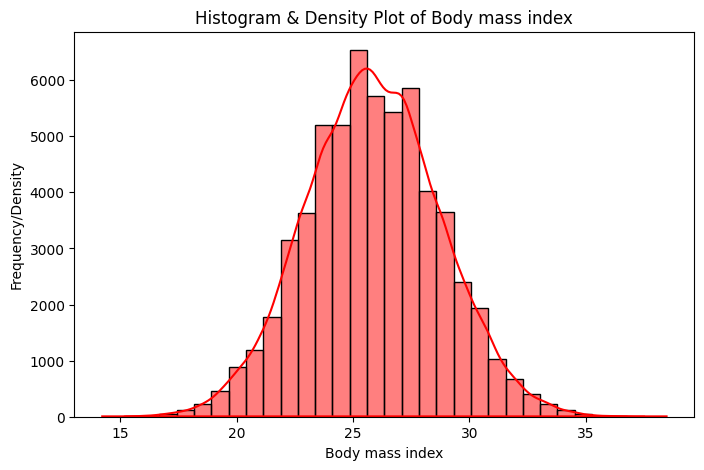

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(train_sample["bmi"], bins=30, kde=True, color="red", alpha=0.5)
sns.kdeplot(train_sample["bmi"], color="red", linewidth=2)
plt.title("Histogram & Density Plot of Body mass index")
plt.xlabel("Body mass index")
plt.ylabel("Frequency/Density")
plt.show()

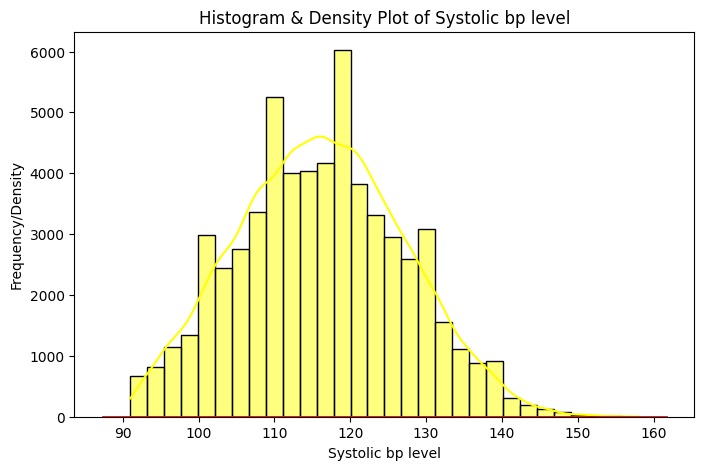

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(train_sample["systolic_bp"], bins=30, kde=True, color="yellow", alpha=0.5)
sns.kdeplot(train_sample["systolic_bp"], color="red", linewidth=2)
plt.title("Histogram & Density Plot of Systolic bp level")
plt.xlabel("Systolic bp level")
plt.ylabel("Frequency/Density")
plt.show()

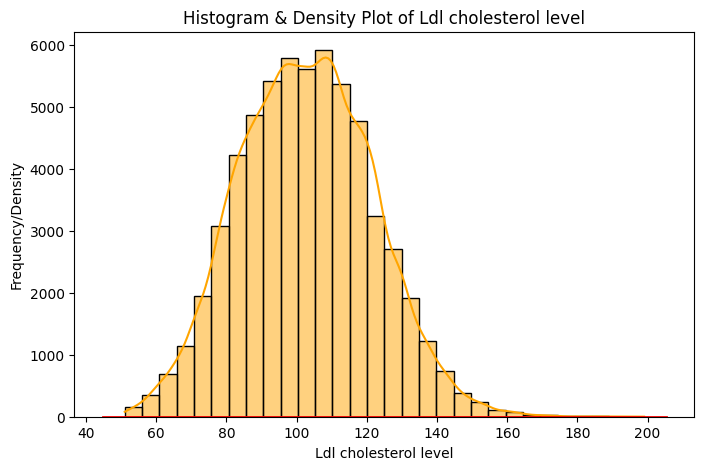

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(train_sample["ldl_cholesterol"], bins=30, kde=True, color="orange", alpha=0.5)
sns.kdeplot(train_sample["ldl_cholesterol"], color="red", linewidth=2)
plt.title("Histogram & Density Plot of Ldl cholesterol level")
plt.xlabel("Ldl cholesterol level")
plt.ylabel("Frequency/Density")
plt.show()

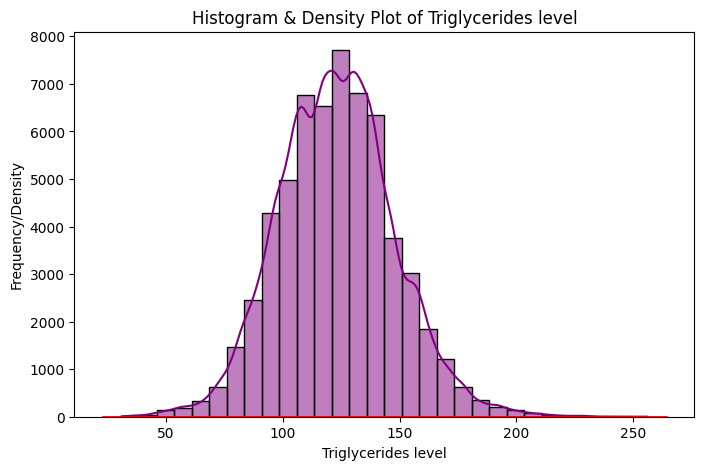

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(train_sample["triglycerides"], bins=30, kde=True, color="purple", alpha=0.5)
sns.kdeplot(train_sample["triglycerides"], color="red", linewidth=2)
plt.title("Histogram & Density Plot of Triglycerides level")
plt.xlabel("Triglycerides level")
plt.ylabel("Frequency/Density")
plt.show()

### Modeling

In [22]:
# splitting features and target
y_train = train['diagnosed_diabetes']
X_train = train.drop(columns=['diagnosed_diabetes'])
y_test = test['diagnosed_diabetes']
X_test = test.drop(columns=['diagnosed_diabetes'])
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

#### Model 1: Logistic Regression with L1 Regularization

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import os, joblib, json

model_filename = "tuned_logreg_model.pkl"

if os.path.exists(model_filename):
    # load model
    print("Loading existing model...")
    lr_pipe = joblib.load(model_filename)
else:
    print("Tuning new model...")
    # preprocess numeric and categorical features
    lr_preprocessor = ColumnTransformer(
        transformers=[
            ('skew_fix', PowerTransformer(method='yeo-johnson', standardize=True), numeric_cols),
            # Use handle_unknown='ignore' to avoid errors with new categories in test set
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
        ])

    # build pipeline
    lr_pipe = Pipeline([
        ('prep', lr_preprocessor),
        ('model', LogisticRegressionCV(l1_ratios=[1], solver='saga', cv=5, scoring='roc_auc', use_legacy_attributes=False))
    ])

    # fit model
    lr_pipe.fit(X_train, y_train)
    
    # save model
    joblib.dump(lr_pipe, model_filename)
    print("Model saved successfully.")
    
    # save best parameters and score
    lr_results = {
        'best_params': lr_pipe.named_steps['model'].get_params(),
        'best_cv_auc': lr_pipe.named_steps['model'].scores_[1].mean(axis=0).max()
    }
    
    with open('lr_results.json', 'w') as f:
        json.dump(lr_results, f, indent=4)
    

# evaluate model
y_probs = lr_pipe.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_probs)
print(f"Final Test AUC: {test_auc:.4f}")

Final Test AUC: 0.6936
Best C found: 10000.0


Performance:

- Final Test AUC: 0.6936
- Best C: 10000

#### Model 2: KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score # Needed for true AUC evaluation

if os.path.exists("tuned_knn_model.pkl"):
    # load model
    print("Loading existing KNN model...")
    best_knn = joblib.load("tuned_knn_model.pkl")
else:
    print("Tuning new KNN model...")

    # reduce training set size for faster tuning
    knn_features = ['physical_activity_minutes_per_week', 'family_history_diabetes', 'age', 'bmi', 'systolic_bp', 'ldl_cholesterol', 'triglycerides']
    X_train_knn = X_train[knn_features]
    y_train_knn = y_train
    X_tune = X_train_knn.sample(frac=0.2, random_state=42)
    y_tune = y_train.loc[X_tune.index]
    knn_numeric_cols = X_train_knn.select_dtypes(include=[np.number]).columns.tolist()
    knn_categorical_cols = X_train_knn.select_dtypes(include=['object']).columns.tolist()

    # preprocess numeric and categorical features
    knn_preprocessor = ColumnTransformer(
        transformers=[
            ('skew_fix', PowerTransformer(method='yeo-johnson', standardize=True), knn_numeric_cols),
            # Use handle_unknown='ignore' to avoid errors with new categories in test set
            ('cat', OneHotEncoder(handle_unknown='ignore'), knn_categorical_cols)
        ]
    )

    # pipeline setup
    knn_pipe = Pipeline([
        ('preprocessor', knn_preprocessor),
        ('knn', KNeighborsClassifier(metric='minkowski')) # Use Minkowski to allow p-tuning
    ])

    # parameter space 
    knn_param_dist = {
        'knn__n_neighbors': [5, 7, 9, 11, 13, 15],
        'knn__p': [1],                         # 1=Manhattan
        'knn__weights': ['uniform', 'distance']
    }

    # random search setup
    knn_random_search = RandomizedSearchCV(
        knn_pipe,
        knn_param_dist,
        n_iter=10,         
        cv=3, 
        scoring='roc_auc', 
        random_state=42,
        n_jobs=-1
    )
    
    # fit model
    knn_random_search.fit(X_tune, y_tune)
    best_knn = knn_random_search.best_estimator_
    
    # save model
    joblib.dump(best_knn, "tuned_knn_model.pkl")
    print("Model saved successfully.")
    
    # save best parameters and score
    knn_results = {
        'best_params': knn_random_search.best_params_,
        'best_cv_auc': knn_random_search.best_score_
    }
    
    with open('knn_results.json', 'w') as f:
        json.dump(knn_results, f, indent=4)


# retrain best model on full training set
best_knn.fit(X_train_knn, y_train_knn)

# evaluate model
y_probs = best_knn.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_probs)

# print results
print(f"Best KNN Test AUC: {test_auc:.4f}")

Best KNN Test AUC: 0.6614
Best K: 15
Best Metric: Manhattan (L1)
Best CV AUC: 0.6610


Best parameters found for KNN:

- K: 15
- Metric: Manhattan (L1)

Performance:

Best CV AUC: 0.6614

#### Model 3: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

if os.path.exists("tuned_rf_model.pkl"):
    # load model
    print("Loading existing RF model...")
    rf_random_search = joblib.load("tuned_rf_model.pkl")
else:
    print("Tuning new RF model...")

    # preprocess numeric and categorical features
    rf_preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols)
        ],
        remainder='passthrough' # keep numeric columns as is
    )

    # pipeline setup
    rf_pipe = Pipeline([
        ('prep', rf_preprocessor),
        ('rf', RandomForestClassifier(random_state=42)) 
    ])


    # parameter space
    rf_param_dist = {
        'rf__n_estimators': randint(100, 300),         # Number of trees
        'rf__max_depth': [10, 20, 30],       # Depth of trees
        'rf__min_samples_split': randint(10, 30),       # Min samples to split a node
        'rf__min_samples_leaf': randint(5, 15),        # Min samples at a leaf
        'rf__max_features': ['sqrt', 'log2'],    # Features to consider at each split
        'rf__bootstrap': [True]                 # Sampling with/without replacement
    }

    # random search setup
    rf_random_search = RandomizedSearchCV(
        estimator=rf_pipe,
        param_distributions=rf_param_dist,
        n_iter=10,          # Try 15 different random combinations
        cv=3,               # 3-fold CV is faster for large forests
        scoring='roc_auc',  # Or 'accuracy' depending on your target
        random_state=42,
        n_jobs=-1,          # Crucial: Random Forest is "embarrassingly parallel"
        verbose=1           # Shows progress so you know it hasn't crashed
    )

    # reduce training set size for faster tuning
    X_tune = X_train.sample(frac=0.3, random_state=42)
    y_tune = y_train.loc[X_tune.index]

    # fit model
    rf_random_search.fit(X_tune, y_tune)
    best_rf = rf_random_search.best_estimator_
    
    # save model
    joblib.dump(best_rf, "tuned_rf_model.pkl")
    print("Model saved successfully.")
    
    # save best parameters and score
    rf_results = {
        'best_params': rf_random_search.best_params_,
        'best_cv_auc': rf_random_search.best_score_
    }
    
    with open('rf_results.json', 'w') as f:
        json.dump(rf_results, f, indent=4)
    

# evaluate model
best_rf.fit(X_train, y_train)
y_probs = best_rf.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_probs)

# print results
print("\n--- RESULTS ---")
print(f"Final Test ROC-AUC: {test_auc:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/home/photonix/git/diabetes-prediction-competition/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



--- RESULTS ---
Best CV ROC-AUC: 0.6993
Final Test ROC-AUC: 0.7025

Best Parameters Found:
bootstrap: True
max_depth: 30
max_features: log2
min_samples_leaf: 12
min_samples_split: 16
n_estimators: 221

Top 5 Most Important Features:
                                          feature  importance
8   remainder__physical_activity_minutes_per_week    0.139458
21             remainder__family_history_diabetes    0.124284
6                                  remainder__age    0.092325
20                       remainder__triglycerides    0.059725
12                                 remainder__bmi    0.059478


Best parameters found for RF:

- bootstrap: True
- max_depth: 30
- max_features: log2
- min_samples_leaf: 12
- min_samples_split: 16
- n_estimators: 221

Performance:

Final Test ROC-AUC: 0.7025

#### Model 4: Gradient Boosting Classifier

In [ ]:
import lightgbm as lgb
from scipy.stats import uniform

if os.path.exists("tuned_lgbm_model.pkl"):
    # load model
    print("Loading existing LGBM model...")
    best_lgbm = joblib.load("tuned_lgbm_model.pkl")
else:
    print("Tuning new LGBM model...")

    # preprocess numeric and categorical features
    lgbm_preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_cols)
        ],
        remainder='passthrough' # keep numeric columns as is
    )

    # pipeline setup
    lgbm_pipe = Pipeline([
        ('prep', lgbm_preprocessor),
        ('lgbm', lgb.LGBMClassifier(random_state=42, verbosity=-1)) # verbosity=-1 silences warnings
    ])

    # parameter space
    lgbm_param_dist = {
        'lgbm__n_estimators': randint(100, 250),
        'lgbm__learning_rate': uniform(0.01, 0.3),    # The 'step size' of the model
        'lgbm__num_leaves': randint(20, 40),         # Main parameter for complexity
        'lgbm__max_depth': [-1, 5, 10, 15],           # -1 means no limit
        'lgbm__min_child_samples': randint(10, 30),  # Similar to min_samples_leaf
        'lgbm__feature_fraction': uniform(0.6, 0.4), # Similar to max_features (uses 50-100% of features)
        'lgbm__bagging_fraction': uniform(0.6, 0.4), # Subsamples the data to save RAM
        'lgbm__bagging_freq': [1, 5],
        'lgbm__cat_smooth': randint(1, 30)
    }

    # random search setup
    lgbm_random_search = RandomizedSearchCV(
        lgbm_pipe,
        param_distributions=lgbm_param_dist,
        n_iter=15,
        cv=3,                # Using 3-fold for speed
        scoring='roc_auc',
        random_state=42,
        n_jobs=-1,            # Keeping this low to avoid the SIGKILL error you saw
        verbose=1
    )

    # fit the model
    lgbm_random_search.fit(X_train, y_train)
    best_lgbm = lgbm_random_search.best_estimator_

    # save model
    joblib.dump(best_lgbm, "tuned_lgbm_model.pkl")          
    print("Model saved successfully.")
    
    # save best parameters and score
    lgbm_results = {
        'best_params': lgbm_random_search.best_params_,
        'best_cv_auc': lgbm_random_search.best_score_
    }
    
    with open('lgbm_results.json', 'w') as f:
        json.dump(lgbm_results, f, indent=4)

# evaluate model
y_probs = best_lgbm.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_probs)

# print results
print(f"\nFinal Test AUC: {test_auc:.4f}")

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/home/photonix/git/diabetes-prediction-competition/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/photonix/git/diabetes-prediction-competition/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/photonix/git/diabetes-prediction-competition/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/photonix/git/diabetes-prediction-competition/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/photonix/git/diabetes-prediction-competition/.venv


Final Test AUC: 0.7253

Best Hyperparameters:
{'lgbm__bagging_fraction': np.float64(0.8916028672163949), 'lgbm__bagging_freq': 1, 'lgbm__cat_smooth': 27, 'lgbm__feature_fraction': np.float64(0.6296178606936361), 'lgbm__learning_rate': np.float64(0.11753971856328177), 'lgbm__max_depth': -1, 'lgbm__min_child_samples': 16, 'lgbm__n_estimators': 171, 'lgbm__num_leaves': 31}


Best parameters found for LightGBM:

- bagging_fraction: np.float64(0.8916028672163949)
- bagging_freq: 1
- cat_smooth: 27
- feature_fraction: np.float64(0.6296178606936361)
- learning_rate: np.float64(0.11753971856328177)
- max_depth: -1
- min_child_samples: 16
- n_estimators: 171
- num_leaves: 31

Performance:

Final Test AUC: 0.7253

#### Conclusion

The identified best candidate is the light gradient boosting model with a final test AUC of 0.7253. Further hyperparameter tuning and feature engineering could potentially improve the model's performance.

Now we merge back the training and validation sets and retrain the model on the entire training data before making final predictions on the test set.

In [27]:
# combine X and y back into full datasets
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

In [28]:
# retrain the best candidate on the full dataset
final_model = lgbm_random_search.best_estimator_
final_model.fit(X_full, y_full)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('prep', ...), ('lgbm', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse ma

In [29]:
# make predictions on competition test set
X_competition = competition_test[X_full.columns]  # ensure same feature order
competition_probs = final_model.predict_proba(X_competition)[:, 1]
submission = pd.DataFrame({
    'id': competition_test.index,
    'diagnosed_diabetes': competition_probs
})  
submission.to_csv('submission.csv', index=False)

/home/photonix/git/diabetes-prediction-competition/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
